# <div align=center> **Simple Linear Regression** </div>

*Simple linear regression* lives up to its name: it is a very straightforward approach for predicting a quantitative response *y* on the bases of a single predictor variable *X*. It assumes that there is approximately a linear relationship between *X* and *y*. Mathematically , we can write this linear relationship as:

$$
    \hat y\ =\ \beta_0\ \ +\ \beta_1X
$$
-
*Where*
- $\hat y$ is the the variable that you want to predict
- $\beta_0$ is the intercept
- $\beta_1$ represents the slope
- $X$ represents the predictor

- **Dataset example**

<table>
<thead>
    <tr>
        <th></th>
        <th>X</th>
        <th>Y</th>
    </tr>
</thead>
<tbody>
    <tr>
        <td>0</td>
        <td>24.1</td>
        <td>785.41</td>
    </tr>
    <tr>
        <td>1</td>
        <td>241.0</td>
        <td>4521.25</td>
    </tr>
    <tr>
        <td>2</td>
        <td>12.48</td>
        <td>570.12</td>
    </tr>
    <tr>
        <td>3</td>
        <td>142.78</td>
        <td>854.20</td>
    </tr>
    <tr>
        <td>4</td>
        <td>412.02</td>
        <td>7854.80</td>
    </tr>
</tbody>
</table>

$\beta_1=\frac{n ( \sum XY) - (\sum X)(\sum Y)}{n (\sum X^2) - (\sum X)^2}$
-
$\beta_0=\frac{( \sum Y)}{n} - \beta_1\frac{( \sum X)}{n}$
-
$\beta_1=\frac{\sum_{i=1}^n(X_i-\overline X)(Y_i-\overline Y)}{\sum_{i=1}^n(X_i-\overline X)^2}$
-
$\beta_0=\hat Y-\beta_0 \hat X$
-
Where:
$\overline X$ and $\overline Y$ are the average of X and Y respectively

## **Example**
#### **Car CO2 Emissions VS Engine Size**

In [39]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [40]:
# import data
data = pd.read_csv('../datasets/co2_emissions_Canada.csv')
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [41]:
co2_df = data[['Engine Size(L)', 'CO2 Emissions(g/km)']]
co2_df

,Engine Size(L),CO2 Emissions(g/km)
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
7380,2.0,219
7381,2.0,232
7382,2.0,240
7383,2.0,232


### **Preprocessing Data**

**Feature Selection**

In [42]:
# change column names
co2_df.columns = ['EngineSize', 'Co2Emissions']

In [43]:
# Verify for missing values
co2_df.isna().sum()

EngineSize      0
Co2Emissions    0
dtype: int64

**Statistical info**

In [44]:
co2_df.describe().T

,count,mean,std,min,25%,50%,75%,max
EngineSize,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Co2Emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


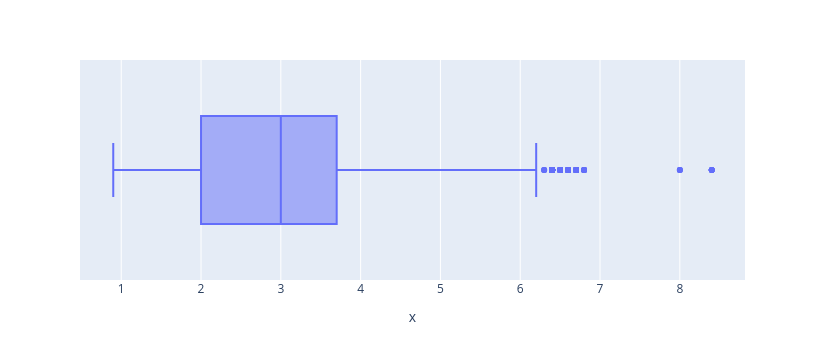

In [45]:
# verify for outliers in X
px.box( x=co2_df['EngineSize'] )

In [46]:
q1 = co2_df['EngineSize'].quantile(0.25)
q3 = co2_df['EngineSize'].quantile(0.75)

IQR = q3 - q1

lower_extreme = q1 - 1.5*IQR
upper_extreme = q3 + 1.5*IQR

outliers = co2_df[ (co2_df['EngineSize'] > upper_extreme) | (co2_df['EngineSize']<lower_extreme) ].index

# dropping outliers
co2_df.drop(outliers, inplace=True)

/tmp/ipykernel_8086/557900527.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## **EDA**

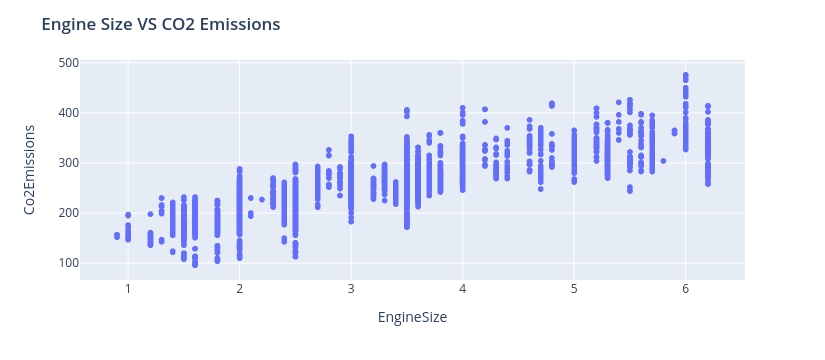

In [47]:
# relationship between EngineSize and C02 emissions
fig = px.scatter(co2_df, x='EngineSize', y='Co2Emissions')
fig.update_layout(title='<b>Engine Size VS CO2 Emissions</b>')
fig.show()

In the plot above we can see that if the engine size increase, the quantity of CO2 emissions increase to, we can say that there is a high relationship between the *engine size** and *XO2 emissions*

In [48]:
co2_df.corr()

,EngineSize,Co2Emissions
EngineSize,1.000000,0.840926
Co2Emissions,0.840926,1.000000


Definitely we have a high relationship between engine size and CO2 emissions, the correlation is very high

## **Machine Learning Model**

In this case we have only one predictor (EngineSize) so if you would  like, you can use the formula to calculate the estimator, but in real life you will use libraries to create machine learning models, now we are using Scikit-Learn library for creating this linear regression models and other

### **Split in feature and outcome variables**

In [49]:
X = co2_df.drop('Co2Emissions', axis=1)
y = co2_df['Co2Emissions']

### **Train - Test Split**
We'll use train/test split function from scikit-learn, this function split our data set in train and test sets, the function first shuffle our dataset and then split the data, this is the easiest method to evaluate a machine learning model but this have some disvantages:
- Eliminating data that could have been used to training set
- Producing results that can vary for a particular train, test split (random_state)

These problems we can solve with **cross-validation** this topic we will see in the future.

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### **Normalize Data**

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Train the Model**

In [52]:
from sklearn.linear_model import LinearRegression

# create an instance of LinearRegression class
lin_reg = LinearRegression()

# fit the feature
fitted_lin_reg = lin_reg.fit(X_train, y_train)

# make predictions
model_preds = fitted_lin_reg.predict(X_test)

In [53]:
intercept = fitted_lin_reg.intercept_
slope = fitted_lin_reg.coef_

print(f' Slope: {slope[0]} - Intercept: {intercept} ')

 Slope: 46.9001473831744 - Intercept: 248.39427388754743 


### **Plot Linear REgressio**

In this case create a plot of linear regression is simple, since we have only one feature, if we have two feature we have to create a 3D plot but if we have 3 or more features it's impossible create a plot

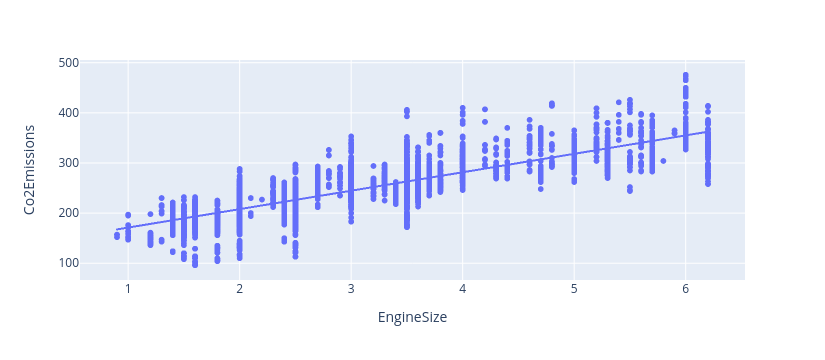

In [54]:
x_range = np.linspace(X_train.min(), X_train.max(), 100)
y_range = fitted_lin_reg.predict(x_range.reshape(-1, 1))
fig = px.scatter( co2_df, x='EngineSize', y='Co2Emissions', trendline='ols' )

fig.show()

### **Evaluate Model with Metrics**

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test, model_preds)
MSE = mean_squared_error(y_test, model_preds)
RMSE = np.sqrt( MSE)
r2 = r2_score(y_test, model_preds)

print( f'MAE = {MAE}' )
print( f'MSE = {MSE}' )
print( f'RMSE = {RMSE}' )
print( f'R2 = {r2}' )

MAE = 22.900802539102383
MSE = 928.7368890063497
RMSE = 30.475184806762858
R2 = 0.7061853513410064


### **Comparison between Train Error and Test Error**

In [56]:
# train error
train_preds = fitted_lin_reg.predict(X_train)
train_error = mean_squared_error( y_train, train_preds )

# test error
test_preds = fitted_lin_reg.predict(X_test)
test_error = mean_squared_error(y_test, test_preds)

print( f' Train error -> {train_error}\nTest error -> {test_error} ' )

 Train error -> 910.0089263666836
Test error -> 928.7368890063497 


We can compare the MSE error in training and test data to determine if our model is good or not:

- **Underfitting** -> test/validation and training error
- **Overfitting** -> test/validation error is high, training error low
- **Good fit** -> test/validation error low, slightly higher than training error
- **Unknow fit** -> test/validation error low, training error high

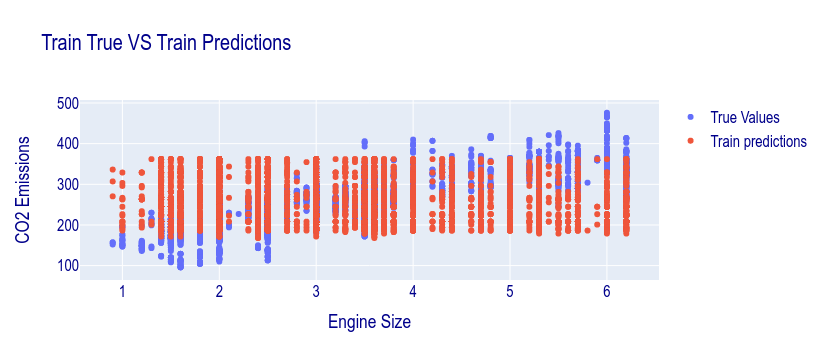

In [62]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=co2_df['EngineSize'], y=co2_df['Co2Emissions'], mode='markers', name='True Values')
)
fig.add_trace(
    go.Scatter(x=co2_df['EngineSize'], y=train_preds, mode='markers', name='Train predictions')
)
fig.update_layout(title_text='Train True VS Train Predictions',
                 xaxis_title='Engine Size',
                 yaxis_title='CO2 Emissions',
                 font= dict(
                 family='Arial',
                 size=16,
                 color='darkblue'))
fig.show()

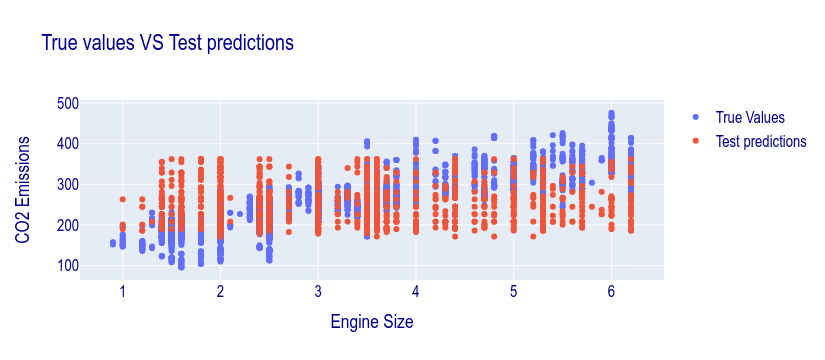

In [64]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=co2_df['EngineSize'], y=co2_df['Co2Emissions'], mode='markers', name='True Values')
)
fig.add_trace(
    go.Scatter(x=co2_df['EngineSize'], y=test_preds, mode='markers', name='Test predictions')
)

fig.update_layout(title_text='True values VS Test predictions',
                 xaxis_title='Engine Size',
                 yaxis_title='CO2 Emissions',
                 font= dict(
                 family='Arial',
                 size=16,
                 color='darkblue'))
fig.show()